<a href="https://colab.research.google.com/github/brenolucas00/exerc-ciosawariwebscrapping/blob/main/Tarefa_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
varusadas = df[['CreditScore','Geography', 'Gender','Age','Tenure','NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']]

In [13]:
varusadas.describe()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,199992.480000,1.000000


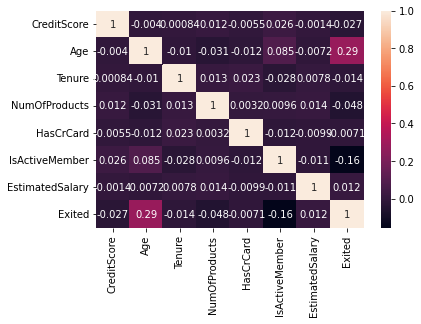

In [14]:
sns.heatmap(varusadas.corr(), annot=True)

In [15]:
x = varusadas[['Age', 'Tenure', 'EstimatedSalary']]
x

,Age,Tenure,EstimatedSalary
0,42,2,101348.88
1,41,1,112542.58
2,42,8,113931.57
3,39,1,93826.63
4,43,2,79084.10
...,...,...,...
9995,39,5,96270.64
9996,35,10,101699.77
9997,36,7,42085.58
9998,42,3,92888.52


In [16]:
y=varusadas[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [17]:
x.shape, y.shape

((10000, 3), (10000, 1))

In [24]:
SEED = 40
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [19]:
y_teste

,Exited
293,1
1244,0
7353,1
5145,0
1618,0
...,...
7978,0
4190,0
8750,0
8208,0


In [20]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='stratified', random_state=SEED)


In [22]:
dc.fit(x_treino,y_treino)

DummyClassifier(random_state=40, strategy='stratified')

In [25]:
print (x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(7500, 3) (7500, 1) (2500, 3) (2500, 1)


In [26]:
resultado = dc.predict(x_teste)
resultado

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()
rfc.fit (x_treino, y_treino)
result_rfc = rfc.predict(x_teste)
result_rfc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0, 0, 0, ..., 0, 0, 1])

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(x_treino, y_treino)
result_svc = svc.predict(x_teste)
result_svc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
dc.score(x_teste, y_teste)

0.6772

In [32]:
rfc.score(x_teste, y_teste)

0.7652

In [33]:
svc.score(x_teste, y_teste)

0.8044